# WeatherPy
----

#### Note
The data was retrieved on 07/19/2020 14:00pm (Pacific Time) via http://api.openweathermap.org

#### Observations
* On southern hemisphere, city max temperature has strong relationship with latitude. The further the city is aways from the equator, the lower the temperature is. The same principle applies to northern hemisphere, but the relationship is weaker.
* From the this dataset, cloundiness and humidity have weak (almost no) relationship with latitude on both hemispheres.
* From the this dataset, wind speed does not show strong relationship with latitude either.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude (install seperately)
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [52]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [53]:
base_url="http://api.openweathermap.org/data/2.5/weather?units=imperial&appid="

#create lists for data to be filled in with APT calls
city_name=[]
lat=[]
lon=[]
max_temp=[]
humidity=[]
cloud=[]
wind_speed=[]
country=[]
date=[]

record=1

print("Beginning Data Retrieval")
print("-------------------------------")

for i in range (len(cities)):
    
    try:
        response=requests.get(base_url+weather_api_key+"&q="+cities[i]).json()
        
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing record {record} | {cities[i]}")
        
        record+=1
    
    
        #suspend the execution for 1.5 seconds to not go over the limt of API request
        time.sleep(1.5)
        
    #execute this line and keep going instead of stopping the for loop and throw errors
    except:
        print(f"city {cities[i]} not found... skipping")
    continue

print("-----------------------------")
print("Data Retrieval Complete ")
print("-----------------------------")

Beginning Data Retrieval
-------------------------------
Processing record 1 | arraial do cabo
Processing record 2 | mar del plata
Processing record 3 | trairi
Processing record 4 | georgetown
Processing record 5 | avarua
Processing record 6 | palu
Processing record 7 | yellowknife
Processing record 8 | chokurdakh
Processing record 9 | kodiak
Processing record 10 | sinnamary
Processing record 11 | rikitea
city yirol not found... skipping
Processing record 12 | dikson
Processing record 13 | ihosy
Processing record 14 | hilo
Processing record 15 | aloleng
Processing record 16 | cidreira
Processing record 17 | cape town
Processing record 18 | san buenaventura
Processing record 19 | ponta do sol
Processing record 20 | talnakh
Processing record 21 | bluff
Processing record 22 | new norfolk
Processing record 23 | punta arenas
Processing record 24 | hambantota
city marcona not found... skipping
Processing record 25 | bubaque
Processing record 26 | sungaipenuh
Processing record 27 | praia
Proc

Processing record 223 | clyde river
Processing record 224 | halifax
Processing record 225 | umm lajj
city karaul not found... skipping
Processing record 226 | touros
Processing record 227 | mugur-aksy
Processing record 228 | trapani
Processing record 229 | vredendal
Processing record 230 | carlisle
Processing record 231 | santa cruz cabralia
Processing record 232 | kushima
Processing record 233 | cavalcante
Processing record 234 | aksha
Processing record 235 | wanaka
Processing record 236 | constitucion
Processing record 237 | egvekinot
Processing record 238 | bagdarin
Processing record 239 | leningradskiy
Processing record 240 | tual
Processing record 241 | urengoy
Processing record 242 | dicabisagan
Processing record 243 | ongandjera
Processing record 244 | vestmannaeyjar
Processing record 245 | brae
Processing record 246 | ahuimanu
Processing record 247 | mangan
Processing record 248 | atar
Processing record 249 | meulaboh
Processing record 250 | nuuk
Processing record 251 | bengkul

Processing record 449 | carandai
Processing record 450 | kemalpasa
Processing record 451 | kokorevka
Processing record 452 | bilma
Processing record 453 | granadilla de abona
city bolungarvik not found... skipping
Processing record 454 | vestmanna
Processing record 455 | kahului
Processing record 456 | caucaia
Processing record 457 | progreso
Processing record 458 | los llanos de aridane
Processing record 459 | avera
Processing record 460 | tak
Processing record 461 | cloquet
Processing record 462 | hushitai
Processing record 463 | maracai
Processing record 464 | ishigaki
Processing record 465 | guaruja
Processing record 466 | krasnoselkup
Processing record 467 | mestia
Processing record 468 | kimberley
Processing record 469 | hualmay
Processing record 470 | iqaluit
Processing record 471 | gravdal
Processing record 472 | phan thiet
Processing record 473 | palusapis
city longlac not found... skipping
Processing record 474 | kjopsvik
Processing record 475 | mezen
Processing record 476 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [71]:
df=pd.DataFrame({"City":city_name,"Lat":lat,"Lng":lon,"Max Temp":max_temp,
                 "Humidity":humidity,"Cloudiness":cloud,"Wind Speed":wind_speed,
                "Country":country,"Date":date})

In [72]:
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial do Cabo,-22.97,-42.03,73.40,78,0,17.22,BR,1595192182
1,Mar del Plata,-38.00,-57.56,55.40,93,75,13.87,AR,1595192184
2,Trairi,-3.28,-39.27,77.77,74,23,11.07,BR,1595192186
3,George Town,5.41,100.34,80.60,100,40,4.70,MY,1595192098
4,Avarua,-21.21,-159.78,75.20,83,83,16.11,CK,1595192189


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [73]:
for i in range(len(df)):
    if df['Humidity'][i]>100:
        print(df['Humidity'][i])

#result: no city has humidity higher than 100%

In [74]:
df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [75]:
# Export the City_Data into a csv
df.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

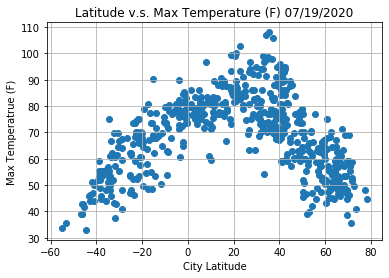

In [103]:
plt.grid()
plt.scatter(df['Lat'],df['Max Temp'])
plt.title("Latitude v.s. Max Temperature (F) 07/19/2020")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperatrue (F)")


## Latitude vs. Humidity Plot

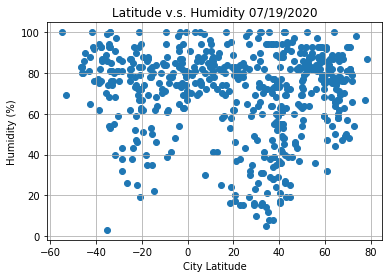

In [104]:
plt.grid()
plt.scatter(df['Lat'],df['Humidity'])

plt.title("Latitude v.s. Humidity 07/19/2020")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")


## Latitude vs. Cloudiness Plot

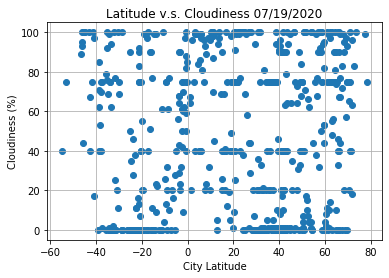

In [105]:
plt.grid()
plt.scatter(df['Lat'],df['Cloudiness'])

plt.title("Latitude v.s. Cloudiness 07/19/2020")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")

## Latitude vs. Wind Speed Plot

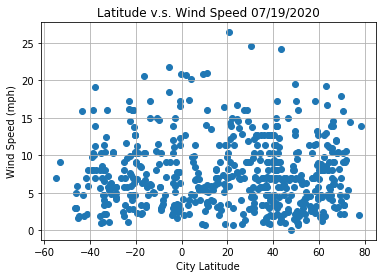

In [106]:
plt.grid()
plt.scatter(df['Lat'],df['Wind Speed'])

plt.title("Latitude v.s. Wind Speed 07/19/2020")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")

## Linear Regression

In [107]:
# OPTIONAL: Create a function to create Linear Regression plots

def linear_reg_plot(x,y):
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
    print(f"The r-squared is: {rvalue**2}")
    predicted_y=x*slope+intercept
    line_equation="y= "+str(round(slope,2))+"x + "+str(round(intercept,2))

    fig, ax = plt.subplots()
    plt.grid(linestyle='--')

    #plot
    plt.scatter(x,y,s=y,marker='o',alpha=0.65)
    plt.plot(x,predicted_y,'r-')
    ax.text(min(x)+5,min(y)+5,line_equation,color='red',fontsize=16)
    
    #label
    plt.xlabel("City Latitude")


In [108]:
# Create Northern and Southern Hemisphere DataFrames
north_df=df.loc[df['Lat']>=0,:]
south_df=df.loc[df['Lat']<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4664860127952456


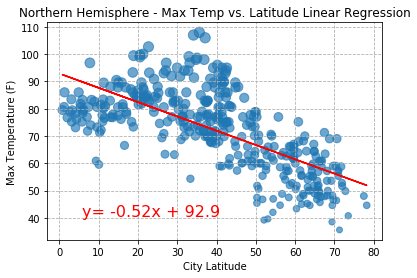

In [109]:
linear_reg_plot(north_df['Lat'],north_df['Max Temp'])
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6314286717017435


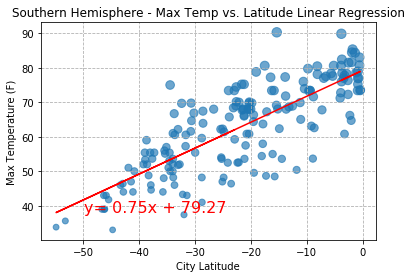

In [111]:
linear_reg_plot(south_df['Lat'],south_df['Max Temp'])
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004110262260153974


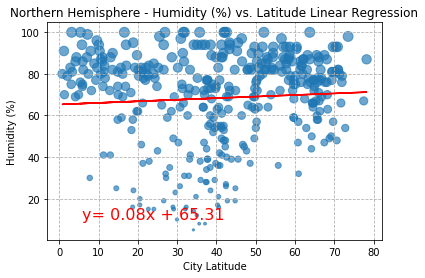

In [112]:
linear_reg_plot(north_df['Lat'],north_df['Humidity'])
plt.ylabel("Humidity (%)")

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig("output_data/North Hem-Humidity vs Lat Liner Reg")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008360814109368198


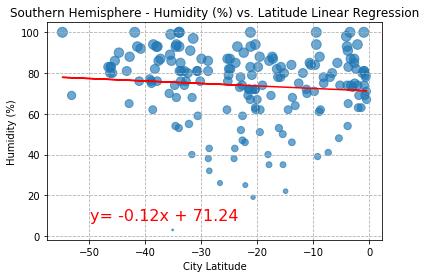

In [113]:
linear_reg_plot(south_df['Lat'],south_df['Humidity'])
plt.ylabel("Humidity (%)")

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig("output_data/South Hem-Humidity vs Lat Linear Reg")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.001978526141234475


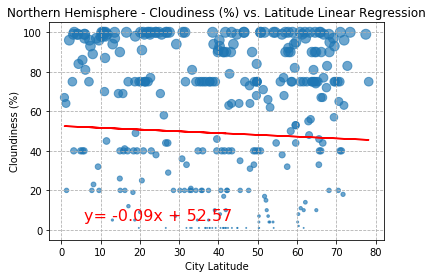

In [114]:
linear_reg_plot(north_df['Lat'],north_df['Cloudiness'])
plt.ylabel("Cloundiness (%)")

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig("output_data/North Hem-Cloudiness vs Lat Linear Reg")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0030052089276821257


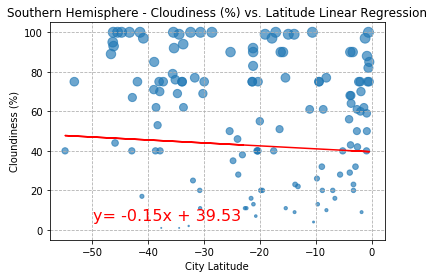

In [117]:
linear_reg_plot(south_df['Lat'],south_df['Cloudiness'])
plt.ylabel("Cloundiness (%)")

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig("output_data/South Hem-Cloudiness vs Lat Linear Reg")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0023960586134573335


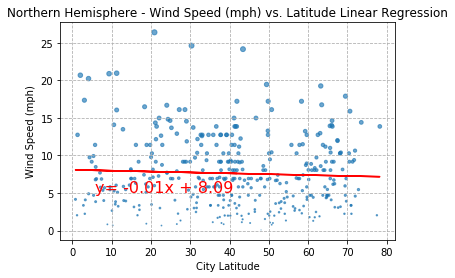

In [118]:
linear_reg_plot(north_df['Lat'],north_df['Wind Speed'])
plt.ylabel("Wind Speed (mph)")

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig("output_data/North Hem-WindSpeed vs Lat Linear Reg")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.017279769900295935


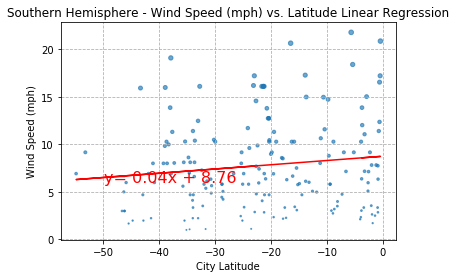

In [119]:
linear_reg_plot(south_df['Lat'],south_df['Wind Speed'])
plt.ylabel("Wind Speed (mph)")

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig("output_data/South Hem-WindSpeed vs Lat Linear Reg")